In [63]:
ROOT_DIR=".."

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

df = pd.read_parquet(f"{ROOT_DIR}/data/preprocessed/combined.parquet")

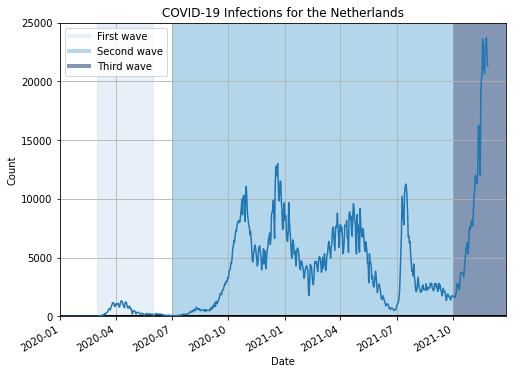

In [143]:
fig, ax = plt.subplots()
cmap = plt.cm.Blues

plt.axhline(linewidth=2, color='black')
# first wave
plt.axvspan(pd.to_datetime("2020-03-01"), pd.to_datetime("2020-05-31"), color=cmap(0.2), alpha=0.5)
# second wave
plt.axvspan(pd.to_datetime("2020-07-01"), pd.to_datetime("2021-09-30"), color=cmap(.5), alpha=0.5)
# third wave
plt.axvspan(pd.to_datetime("2021-10-01"), pd.to_datetime("2021-12-26"), color=cmap(1.), alpha=0.5)

idx = pd.IndexSlice
sdf = df.loc[idx[:, ["RDSA.AS"]], :]
sdf = sdf.reset_index(level=[0,1]).set_index("date")
sdf.loc["2020-01-01":"2021-12-26"].infected.plot(grid=True, ylim=(0,25000), xlim=("2020-01-01", "2021-12-26"), yticks=[_ for _ in range(0, 30000, 5000)], xlabel="Date", ylabel="Count", title="COVID-19 Infections for the Netherlands", figsize=(8,6))

custom_lines = [Line2D([0], [0], color=cmap(0.2), lw=4, alpha=0.5),
                Line2D([0], [0], color=cmap(.5), lw=4, alpha=0.5),
                Line2D([0], [0], color=cmap(1.), lw=4, alpha=0.5)]

ax.legend(custom_lines, ["First wave", "Second wave", "Third wave"])

plt.savefig(f"{ROOT_DIR}/plots/covid_19_infections_NL.png", transparent=True)

plt.show()

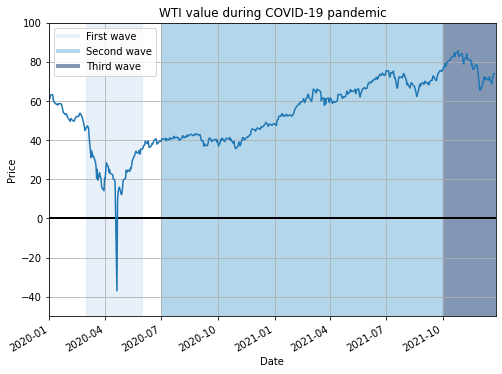

In [144]:
wti_csv_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=DCOILWTICO&scale=left&cosd=2017-01-03&coed=2022-01-03&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Daily&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-01-09&revision_date=2022-01-09&nd=1986-01-02"

fig, ax = plt.subplots()
cmap = plt.cm.Blues

plt.axhline(linewidth=2, color='black')
# first wave
plt.axvspan(pd.to_datetime("2020-03-01"), pd.to_datetime("2020-05-31"), color=cmap(0.2), alpha=0.5)
# second wave
plt.axvspan(pd.to_datetime("2020-07-01"), pd.to_datetime("2021-09-30"), color=cmap(.5), alpha=0.5)
# third wave
plt.axvspan(pd.to_datetime("2021-10-01"), pd.to_datetime("2021-12-26"), color=cmap(1.), alpha=0.5)

df_wti = pd.read_csv(wti_csv_url, names=["date", "wti"], index_col="date", skiprows=1, parse_dates=["date"])
df_wti["wti"] = df_wti["wti"].apply(lambda x: None if x == "." else x).fillna(method="ffill").astype("float64")
df_wti.loc["2020-01-01":"2021-12-26"].wti.plot(grid=True, ax=ax, ylim=(-50,100), xlim=("2020-01-01", "2021-12-26"), xlabel="Date", ylabel="Price", title="WTI value during COVID-19 pandemic", figsize=(8,6))

custom_lines = [Line2D([0], [0], color=cmap(0.2), lw=4, alpha=0.5),
                Line2D([0], [0], color=cmap(.5), lw=4, alpha=0.5),
                Line2D([0], [0], color=cmap(1.), lw=4, alpha=0.5)]

ax.legend(custom_lines, ["First wave", "Second wave", "Third wave"])

plt.savefig(f"{ROOT_DIR}/plots/covid_19_WTI.png", transparent=True)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


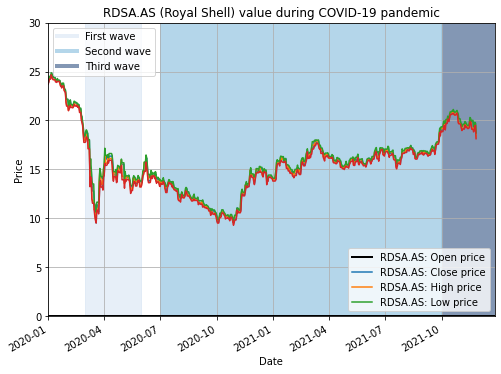

In [152]:
fig, ax = plt.subplots()
cmap = plt.cm.Blues

plt.axhline(linewidth=2, color='black')
# first wave
plt.axvspan(pd.to_datetime("2020-03-01"), pd.to_datetime("2020-05-31"), color=cmap(0.2), alpha=0.5)
# second wave
plt.axvspan(pd.to_datetime("2020-07-01"), pd.to_datetime("2021-09-30"), color=cmap(.5), alpha=0.5)
# third wave
plt.axvspan(pd.to_datetime("2021-10-01"), pd.to_datetime("2021-12-26"), color=cmap(1.), alpha=0.5)

plot_labels = ["open", "close", "high", "low"]


custom_lines = [Line2D([0], [0], color=cmap(0.2), lw=4, alpha=0.5),
                Line2D([0], [0], color=cmap(.5), lw=4, alpha=0.5),
                Line2D([0], [0], color=cmap(1.), lw=4, alpha=0.5)]

first_legend = plt.legend(custom_lines, ["First wave", "Second wave", "Third wave"])

idx = pd.IndexSlice
sdf = df.loc[idx[:, ["RDSA.AS"]], :]
sdf = sdf.reset_index(level=[0,1]).set_index("date")

sdf.loc["2020-01-01":"2021-12-26"][plot_labels].plot(kind="line", ax=ax, grid=True, xlim=("2020-01-01", "2021-12-26"), ylim=(0, 30), xlabel="Date", ylabel="Price", title="RDSA.AS (Royal Shell) value during COVID-19 pandemic", figsize=(8,6)).add_artist(first_legend)

plt.legend(second_lines, labels=[f"RDSA.AS: {_.capitalize()} price" for _ in plot_labels], loc="lower right")

plt.savefig(f"{ROOT_DIR}/plots/covid_19_RDSA.png", transparent=True)

plt.show()